In [1]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l


In [4]:
n_train, n_test, nums_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((nums_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b,n_train)
test_data = d2l.synthetic_data(true_w, true_b,n_test)
train_iter = d2l.load_array(train_data, batch_size)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [5]:
def init_params():
    w = torch.normal(0, 1, size=(nums_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

In [6]:
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

In [7]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    nums_epochs, lr = 100, 0.003
    animator = d2l.Animator(
        xlabel='epochs', 
        ylabel='loss',
        yscale='log',
        xlim=[5, nums_epochs],
        legend=['train', 'test']
    )
    for epoch in range(nums_epochs):
        for X, y in train_iter:
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(
                epoch + 1, 
                (
                    d2l.evaluate_loss(net, train_iter, loss),
                    d2l.evaluate_loss(net, test_iter, loss)
                )
            )
    print(f'W的l2范数为：{torch.norm(w).item()}')

W的l2范数为：12.631280899047852


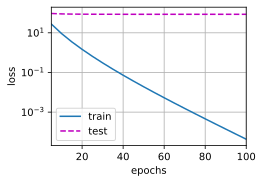

In [17]:
train(lambd=0)

W的l2范数为：0.36184561252593994


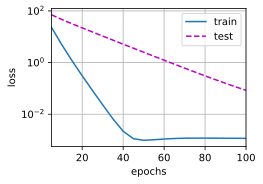

In [18]:
train(lambd=3)

W的l2范数为：0.06204130873084068


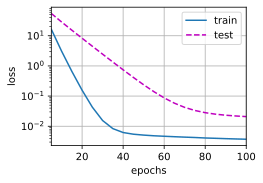

In [19]:
train(lambd=5)

W的l2范数为：0.027960000559687614


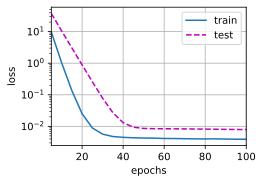

In [20]:
train(lambd=10)

W的l2范数为：0.018054120242595673


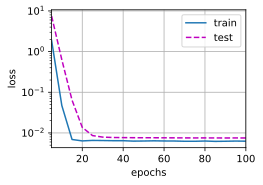

In [22]:
train(lambd=20)

W的l2范数为：0.013322633691132069


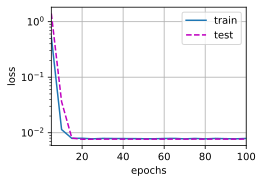

In [24]:
train(lambd=30)

In [25]:
def l1_penalty(w):
    return torch.sum(torch.abs(w))

In [26]:
def train_l1(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    nums_epochs, lr = 100, 0.003
    animator = d2l.Animator(
        xlabel='epochs', 
        ylabel='loss',
        yscale='log',
        xlim=[5, nums_epochs],
        legend=['train', 'test']
    )
    for epoch in range(nums_epochs):
        for X, y in train_iter:
            l = loss(net(X), y) + lambd * l1_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(
                epoch + 1, 
                (
                    d2l.evaluate_loss(net, train_iter, loss),
                    d2l.evaluate_loss(net, test_iter, loss)
                )
            )
    print(f'W的l2范数为：{torch.norm(w).item()}')

W的l2范数为：13.245853424072266


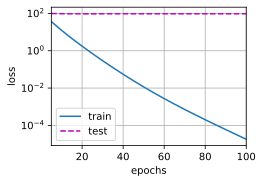

In [27]:
train_l1(0)

W的l2范数为：0.07457636296749115


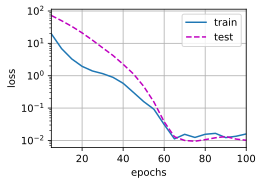

In [28]:
train_l1(3)

W的l2范数为：0.12283860146999359


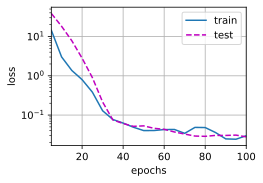

In [29]:
train_l1(5)

W的l2范数为：0.24787315726280212


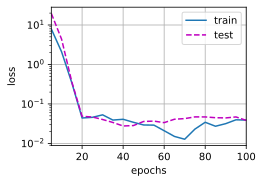

In [30]:
train_l1(10)

W的l2范数为：0.4820523262023926


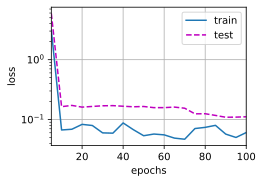

In [31]:
train_l1(20)

W的l2范数为：0.7090204358100891


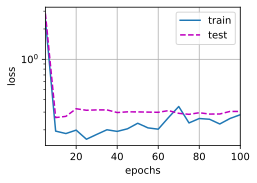

In [32]:
train_l1(30)